# Fine-tuning keras models
>  Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Introduction to Deep Learning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Understanding model optimization

### Diagnosing optimization problems

<p>Which of the following could prevent a model from showing an improved loss in its first few epochs?</p>

<pre>
Possible Answers

Learning rate too low.

Learning rate too high.

Poor choice of activation function.

<b>All of the above.</b>

</pre>

**All the options listed could prevent a model from showing an improved loss in its first few epochs.'**

### Changing optimization parameters

<div class=""><p>It's time to get your hands dirty with optimization.  You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate.  You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.</p>
<p>For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic).  You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function <code>get_new_model()</code> that creates an unoptimized model to optimize.</p></div>

In [7]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [16]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/15-introduction-to-deep-learning-in-python/datasets/titanic_891x11.csv')

In [25]:
predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = to_categorical(df.survived)
input_shape = (predictors.shape[1], )

In [26]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

Instructions
<ul>
<li>Import <code>SGD</code> from <code>keras.optimizers</code>.</li>
<li>Create a list of learning rates to try optimizing with called <code>lr_to_test</code>. The learning rates in it should be <code>.000001</code>, <code>0.01</code>, and <code>1</code>. </li>
<li>Using a <code>for</code> loop to iterate over <code>lr_to_test</code>:<ul>
<li>Use the <code>get_new_model()</code> function to build a new, unoptimized model.</li>
<li>Create an optimizer called <code>my_optimizer</code> using the <code>SGD()</code> constructor with keyword argument <code>lr=lr</code>.</li>
<li>Compile your model. Set the <code>optimizer</code> parameter to be the SGD object you created above, and because this is a classification problem, use <code>'categorical_crossentropy'</code> for the <code>loss</code> parameter.</li>
<li>Fit your model using the <code>predictors</code> and <code>target</code>.</li></ul></li>
</ul>

In [28]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr = lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target, epochs=10)
    



Testing model with learning rate: 0.000001

Epoch 1/10
28/28 [==============================] - 0s 1ms/step - loss: 5.7038
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 5.6222
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 5.4687
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 5.4891
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 5.0770
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 5.2242
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 4.9831
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 5.2991
Epoch 9/10
28/28 [==============================] - 0s 1ms/step - loss: 5.2801
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 5.2403


Testing model with learning rate: 0.010000

Epoch 1/10
28/28 [==============================] - 0s 1ms/step - loss: 2.8769
Epoch 2/10
28/28 [====================

## Model validation

### Evaluating model accuracy on validation dataset

<p>Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as <code>model</code>. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.</p>

Instructions
<ul>
<li>Compile your model using <code>'adam'</code> as the <code>optimizer</code> and <code>'categorical_crossentropy'</code> for the <code>loss</code>. To see what fraction of predictions are correct (the <code>accuracy</code>) in each epoch, specify the additional keyword argument <code>metrics=['accuracy']</code> in <code>model.compile()</code>.</li>
<li>Fit the model using the <code>predictors</code> and <code>target</code>. Create a validation split of 30% (or <code>0.3</code>). This will be reported in each epoch.</li>
</ul>

In [29]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, epochs=10, validation_split=0.3)

Epoch 1/10
20/20 [==============================] - 1s 23ms/step - loss: 1.8329 - accuracy: 0.4998 - val_loss: 0.8384 - val_accuracy: 0.7313
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7998 - accuracy: 0.6568 - val_loss: 0.7053 - val_accuracy: 0.6493
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6405 - val_loss: 0.5392 - val_accuracy: 0.7351
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.6419 - val_loss: 0.5500 - val_accuracy: 0.7313
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.7056 - val_loss: 0.5016 - val_accuracy: 0.7724
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6695 - val_loss: 1.0098 - val_accuracy: 0.6493
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.8267 - accuracy: 0.5971 - val_loss: 0.5414 - val_accuracy: 0.7500
Epoch 8/10
20/20 [=

### Early stopping: Optimizing the optimization

<div class=""><p>Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more.  Since the optimization stops automatically when it isn't helping, you can also set a high value for <code>epochs</code> in your call to <code>.fit()</code>, as Dan showed in the video.</p>
<p>The model you'll optimize has been specified as <code>model</code>. As before, the data is pre-loaded as <code>predictors</code> and <code>target</code>.</p></div>

Instructions
<ul>
<li>Import <code>EarlyStopping</code> from <code>keras.callbacks</code>.</li>
<li>Compile the model, once again using <code>'adam'</code> as the <code>optimizer</code>, <code>'categorical_crossentropy'</code> as the loss function, and <code>metrics=['accuracy']</code> to see the accuracy at each epoch.</li>
<li>Create an <code>EarlyStopping</code> object called <code>early_stopping_monitor</code>. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the <code>patience</code> parameter of <code>EarlyStopping()</code> to be <code>2</code>.</li>
<li>Fit the model using the <code>predictors</code> and <code>target</code>. Specify the number of <code>epochs</code> to be <code>30</code> and use a validation split of <code>0.3</code>. In addition, pass <code>[early_stopping_monitor]</code> to the <code>callbacks</code> parameter.</li>
</ul>

In [30]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 1s 11ms/step - loss: 1.4336 - accuracy: 0.5029 - val_loss: 0.6313 - val_accuracy: 0.6940
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 0.7789 - accuracy: 0.6420 - val_loss: 0.5462 - val_accuracy: 0.7463
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6900 - val_loss: 0.5199 - val_accuracy: 0.7761
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.6955 - val_loss: 0.5245 - val_accuracy: 0.7910
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.7074 - val_loss: 0.5991 - val_accuracy: 0.7388




```
    Epoch 4/30
623/623 [==============================] - 0s - loss: 0.7349 - acc: 0.6388 - val_loss: 0.5378 - val_acc: 0.7164
    Epoch 5/30
623/623 [==============================] - 0s - loss: 0.6435 - acc: 0.6597 - val_loss: 0.5816 - val_acc: 0.6978
    Epoch 6/30
623/623 [==============================] - 0s - loss: 0.5958 - acc: 0.6934 - val_loss: 0.5710 - val_acc: 0.6866
    Epoch 7/30
623/623 [==============================] - 0s - loss: 0.6420 - acc: 0.7095 - val_loss: 0.6700 - val_acc: 0.6455
```


**Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 7 epochs.**

### Experimenting with wider networks

<div class=""><p>Now you know everything you need to begin experimenting with different models!</p>
<p>A model called <code>model_1</code> has been pre-loaded.  You can see a summary of this model printed in the IPython Shell.  This is a relatively small network, with only 10 units in each hidden layer. </p>
<p>In this exercise you'll create a new model called <code>model_2</code> which is similar to <code>model_1</code>, except it has 100 units in each hidden layer.</p>
<p>After you create <code>model_2</code>, both models will be fitted, and a graph showing both models loss score at each epoch will be shown.  We added the argument <code>verbose=False</code> in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.</p>
<p>Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.</p></div>

In [45]:
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions
<ul>
<li>Create <code>model_2</code> to replicate <code>model_1</code>, but use <code>100</code> nodes instead of <code>10</code> for the first two <code>Dense</code> layers you add with the <code>'relu'</code> activation. Use <code>2</code> nodes for the <code>Dense</code> output layer with <code>'softmax'</code> as the <code>activation</code>.</li>
<li>Compile <code>model_2</code> as you have done with previous models: Using <code>'adam'</code> as the <code>optimizer</code>, <code>'categorical_crossentropy'</code> for the loss, and <code>metrics=['accuracy']</code>.</li>
<li>Hit 'Submit Answer' to fit both the models and visualize which one gives better results! Notice the keyword argument <code>verbose=False</code> in <code>model.fit()</code>: This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.</li>
</ul>

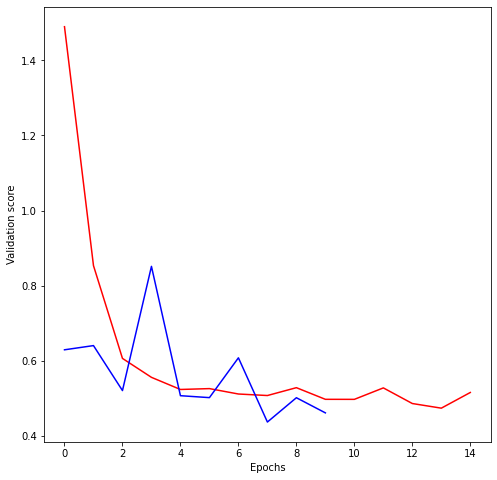

In [41]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax', input_shape=input_shape))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

**The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model.**

### Adding layers to a network

<div class=""><p>You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).  </p>
<p>Once again, you have a baseline model called <code>model_1</code> as a starting point. It has 1 hidden layer, with <code>50</code> units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).</p>
<p>This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.</p></div>

In [67]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions
<ul>
<li>Specify a model called <code>model_2</code> that is like <code>model_1</code>, but which has 3 hidden layers of 50 units instead of only 1 hidden layer. <ul>
<li>Use <code>input_shape</code> to specify the input shape in the first hidden layer.</li>
<li>Use <code>'relu'</code> activation for the 3 hidden layers and <code>'softmax'</code> for the output layer, which should have 2 units.</li></ul></li>
<li>Compile <code>model_2</code> as you have done with previous models: Using <code>'adam'</code> as the <code>optimizer</code>, <code>'categorical_crossentropy'</code> for the loss, and <code>metrics=['accuracy']</code>.</li>
<li>Hit 'Submit Answer' to fit both the models and visualize which one gives better results! For both models, you should look for the best <code>val_loss</code> and <code>val_acc</code>, which won't be the last epoch for that model.</li>
</ul>

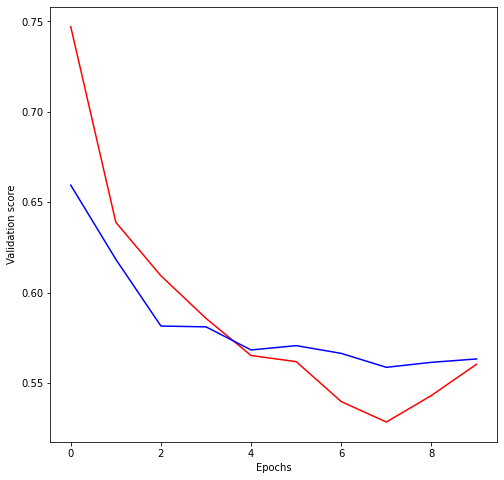

In [68]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

**The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.**

## Thinking about model capacity

### Experimenting with model structures

<p>You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?</p>

<pre>
Possible Answers

Try a new network with fewer layers than anything you have tried yet.

<b>Use more units in each hidden layer.</b>

Use fewer units in each hidden layer.

</pre>


**Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.**

### Building your own digit recognition model

<div class=""><p>You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits! </p>
<p>We've already done the basic manipulation of the MNIST dataset shown in the video, so you have <code>X</code> and <code>y</code> loaded and ready to model with. <code>Sequential</code> and <code>Dense</code> from keras are also pre-imported.</p>
<p>To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex. </p>
<p>If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a <a href="https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws" target="_blank" rel="noopener noreferrer">blog post</a> by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.</p>
<p>Ready to take your deep learning to the next level? Check out <a href="https://www.datacamp.com/courses/advanced-deep-learning-with-keras-in-python" target="_blank" rel="noopener noreferrer">Advanced Deep Learning with Keras in Python</a> to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at <a href="https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing" target="_blank" rel="noopener noreferrer">"Convolutional Neural Networks for Image Processing"</a> to learn image-specific applications of Keras.</p></div>

In [125]:
mnist = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/15-introduction-to-deep-learning-in-python/datasets/mnist_2500x785.csv') #,header=None
X = mnist.iloc[:, 1:].astype(np.float32).to_numpy()
y = to_categorical(mnist.iloc[:, 0])

Instructions
<ul>
<li>Create a <code>Sequential</code> object to start your model.  Call this <code>model</code>.</li>
<li>Add the first <code>Dense</code> hidden layer of <code>50</code> units to your model with <code>'relu'</code> activation. For this data, the <code>input_shape</code> is <code>(784,)</code>.</li>
<li>Add a second <code>Dense</code> hidden layer with <code>50</code> units and a <code>'relu'</code> activation function.</li>
<li>Add the output layer. Your activation function should be <code>'softmax'</code>, and the number of nodes in this layer should be the same as the number of possible outputs in this case: <code>10</code>.</li>
<li>Compile <code>model</code> as you have done with previous models: Using <code>'adam'</code> as the <code>optimizer</code>, <code>'categorical_crossentropy'</code> for the loss, and <code>metrics=['accuracy']</code>.</li>
<li>Fit the model using <code>X</code> and <code>y</code> using a <code>validation_split</code> of <code>0.3</code>.</li>
</ul>

In [126]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))


# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X,y, validation_split=0.3, epochs=10)

Epoch 1/10
55/55 [==============================] - 1s 6ms/step - loss: 40.0337 - accuracy: 0.2510 - val_loss: 6.8317 - val_accuracy: 0.5667
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 4.7206 - accuracy: 0.6372 - val_loss: 4.0055 - val_accuracy: 0.6387
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 2.0828 - accuracy: 0.7600 - val_loss: 3.0044 - val_accuracy: 0.6933
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 1.1448 - accuracy: 0.7910 - val_loss: 2.8377 - val_accuracy: 0.6920
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.8574 - val_loss: 2.3285 - val_accuracy: 0.7187
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.8701 - val_loss: 2.2718 - val_accuracy: 0.7347
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.9147 - val_loss: 2.1147 - val_accuracy: 0.7587
Epoch 8/10
55/55 [=



```
Epoch 10/10
1750/1750 [==============================] - 0s - loss: 0.0958 - acc: 0.9811 - val_loss: 0.3157 - val_acc: 0.9027
```


**You've done something pretty amazing. You should see better than 90% accuracy recognizing handwritten digits, even while using a small training set of only 1750 images!**